1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

False
(1000, 2)


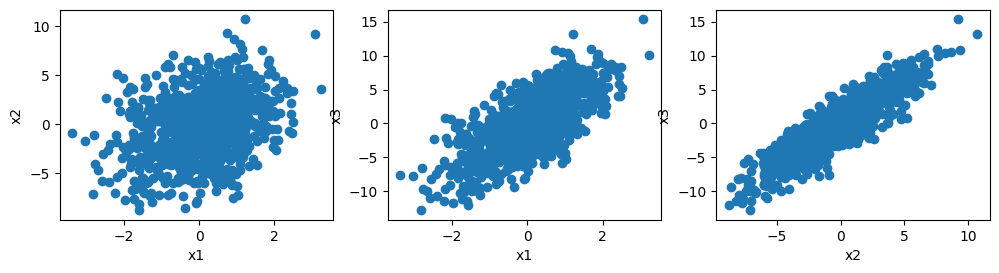

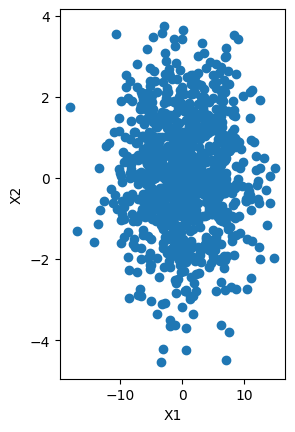

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize,curve_fit
import scipy.optimize as optimize

# Generate a dataset
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2

# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov_matrix = np.cov(np.array([x1, x2, x3]))
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Find the eigenvectors and eigenvalues using the SVD.
U, s, V = np.linalg.svd(np.array([x1, x2, x3]).T)

#  Check that the two procedures yield to same result 
print(np.allclose(eigenvectors,V))

# Compute proportion of variance explained by each eigenvalue
explained_variance = eigenvalues / sum(eigenvalues)

# Select eigenvectors corresponding to the k largest eigenvalues
k = 2
idx = np.argsort(explained_variance)[::-1]
eigenvectors = eigenvectors[:, idx[:k]]

# Redefine the data according to the new basis from the PCA
data_new = np.dot(np.array([x1, x2, x3]).T, eigenvectors)

# Plot the data, in both the original and the new basis
plt.figure(figsize=(12, 6))

# Original basis
plt.subplot(2, 3, 1)
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(2, 3, 2)
plt.scatter(x1, x3)
plt.xlabel("x1")
plt.ylabel("x3")

plt.subplot(2, 3, 3)
plt.scatter(x2, x3)
plt.xlabel("x2")
plt.ylabel("x3")

plt.show()

# New basis
plt.subplot(1, 2, 1)
plt.scatter(data_new[:, 0], data_new[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()



2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

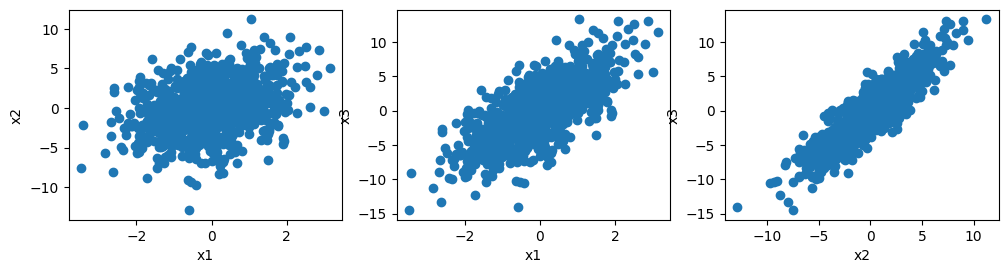

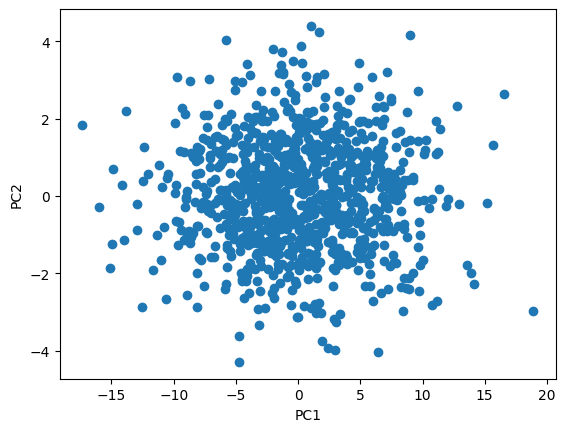

In [20]:
# Add uncorrelated random noise
noise = np.random.normal(0, 0.05, (N, 10))
data = np.hstack((np.array([x1, x2, x3]).T, noise))

# Compute eigenvectors and eigenvalues using eigendecomposition of the covariance matrix
cov_matrix = np.cov(data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Compute proportion of variance explained by each eigenvalue
explained_variance = eigenvalues / sum(eigenvalues)

# Select eigenvectors corresponding to the k largest eigenvalues
k = 2
idx = np.argsort(explained_variance)[::-1]
eigenvectors = eigenvectors[:, idx[:k]]

# Redefine data according to new basis
data_new = np.dot(data, eigenvectors)

# Plot data in original and new basis
plt.figure(figsize=(12, 6))

# Original basis
plt.subplot(2, 3, 1)
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(2, 3, 2)
plt.scatter(x1, x3)
plt.xlabel("x1")
plt.ylabel("x3")

plt.subplot(2, 3, 3)
plt.scatter(x2, x3)
plt.xlabel("x2")
plt.ylabel("x3")

plt.show()

# New basis
plt.scatter(data_new[:, 0], data_new[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [43]:
import pandas as pd
from sklearn.decomposition import PCA

data = pd.read_csv("magic04.data", header=None)
del data[10]

# Perform PCA
pca = PCA(n_components=7)
pca.fit(data)

# Print the explained variance ratio
print(pca.explained_variance_ratio_,"\n")

# Transform the data onto the first seven principal components
data_pca = pca.transform(data)
print(data_pca)

[0.44047283 0.25799074 0.1349833  0.08881765 0.04084794 0.02902655
 0.00785446] 

[[-117.84756134   14.90843517  -12.2354962  ...    3.77822012
     8.06011395    2.34520888]
 [ -10.03020362  -39.38496448    7.96870364 ...  -16.46332331
     9.91633182   -1.41139182]
 [  58.82204263  -40.77377882  136.30468772 ...   39.7182366
    47.61503095   63.54351254]
 ...
 [  63.16087604  -34.64817335  -16.0114702  ...   10.68839485
     9.45718196   17.0683736 ]
 [ 211.45336229  -17.46252333  131.59820968 ...   62.51028996
    66.68782282   22.96400222]
 [ 187.96313576  204.38635587   66.6663764  ...    2.11399085
   -28.33853521  -20.73292443]]
